# Introduction to Neural Networks

## Import packages

In [20]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Understanding the image data format

In [5]:
X_train[0].shape

(28, 28)

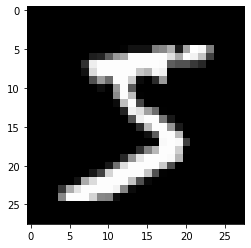

In [6]:
plt.imshow(X_train[0], cmap='gray')

In [7]:
y_train[0]

5

## Preprocessing the image data

In [8]:
X_train = np.reshape(X_train, (len(X_train), 28*28))
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
X_train.shape

(60000, 784)

In [10]:
X_test = np.reshape(X_test, (len(X_test), 28*28))

In [11]:
np.max(X_train[0])

255

In [12]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [13]:
X_train /= 255.0
X_test /= 255.0
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [14]:
y_train.shape

(60000,)

In [15]:
y_train = to_categorical(y_train, 10)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [16]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [17]:
y_train.shape

(60000, 10)

In [18]:
y_test =  to_categorical(y_test, 10)

## Build a model

In [33]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(len(X_train[0]),)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

## Compile the model

In [46]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [48]:
from keras.models import model_from_json

model_config = model.to_json()

with open("config/model.json", "w") as json_file:
    json_file.write(model_config)

In [49]:
len(X_train[0]) * (512+1)

402192

In [50]:
512 * (512+1)

262656

In [51]:
513 * 10

5130

## Train the model

In [52]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))
history

Epoch 1/50
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1812 - accuracy: 0.9442 - val_loss: 0.1062 - val_accuracy: 0.9654
Epoch 2/50
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0793 - accuracy: 0.9750 - val_loss: 0.0743 - val_accuracy: 0.9777
Epoch 3/50
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0552 - accuracy: 0.9822 - val_loss: 0.0756 - val_accuracy: 0.9769
Epoch 4/50
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0432 - accuracy: 0.9861 - val_loss: 0.0750 - val_accuracy: 0.9784
Epoch 5/50
1875/1875 [==============================] - 38s 21ms/step - loss: 0.0338 - accuracy: 0.9893 - val_loss: 0.0708 - val_accuracy: 0.9803
Epoch 6/50
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0270 - accuracy: 0.9912 - val_loss: 0.1086 - val_accuracy: 0.9713
Epoch 7/50
1875/1875 [==============================] - 40s 22ms/step - loss: 0.0271 - accuracy: 0.9911 - val_loss: 0.0804 -

In [54]:
model.save('model/')

INFO:tensorflow:Assets written to: model/assets


## What is the accuracy of the model?

### Plot the accuracy of the training model

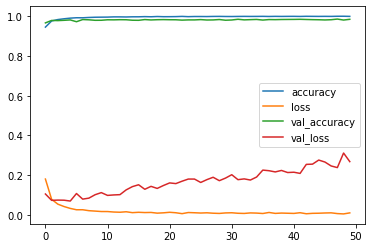

In [55]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])
plt.legend(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [56]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.2687 - accuracy: 0.9834


[0.2687462270259857, 0.9833999872207642]

## Run a prediction

In [164]:
test = np.expand_dims(X_test[0], axis=0)
test.shape

(1, 784)

In [166]:
model.predict(test)

array([[1.8095484e-25, 9.9797774e-21, 5.6769338e-24, 4.2728226e-22,
        3.8501515e-18, 5.2401064e-22, 4.2507459e-29, 1.0000000e+00,
        6.9181483e-20, 5.6536789e-17]], dtype=float32)

In [165]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## Experiment further
- What results do you get with a model with more than 2 hidden layers and more/less neurons.
- What results do you get when trying to use another activation function?
- Try a new dataset with your own neural network and see what accuracy you get.

# Early Stopping and Model Checkpoints

In [44]:
# with open("config/model.json", "r") as json_file:
#     model_config = json_file.read()

# from keras.models import model_from_json
# model = model_from_json(model_config)

In [57]:
# model = load_model('model/')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


# New Model with Low Learning Rate (Smaller Steps)

In [62]:
model_new = Sequential()

model_new.add(Dense(512, activation='relu', input_shape=(len(X_train[0]),)))
model_new.add(Dense(512, activation='relu'))
model_new.add(Dense(10, activation='softmax'))

model_new.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/50
1875/1875 [==============================] - 50s 26ms/step - loss: 0.1864 - accuracy: 0.9435 - val_loss: 0.1002 - val_accuracy: 0.9696
Epoch 2/50
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0812 - accuracy: 0.9748 - val_loss: 0.0840 - val_accuracy: 0.9746
Epoch 3/50
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0555 - accuracy: 0.9824 - val_loss: 0.0768 - val_accuracy: 0.9766
Epoch 4/50
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0433 - accuracy: 0.9864 - val_loss: 0.0842 - val_accuracy: 0.9756
Epoch 5/50
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0365 - accuracy: 0.9881 - val_loss: 0.0937 - val_accuracy: 0.9766
Epoch 6/50
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0289 - accuracy: 0.9907 - val_loss: 0.0827 - val_accuracy: 0.9804
Epoch 7/50
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0262 - accuracy: 0.9916 - val_loss: 0.0894 -

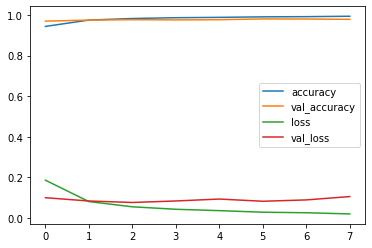

In [63]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)

history_es = model_new.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[es])

# evaluate the model
_, train_acc = model_new.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_new.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
plt.plot(history_es.history['accuracy'], label='accuracy')
plt.plot(history_es.history['val_accuracy'], label='val_accuracy')
plt.plot(history_es.history['loss'], label='loss')
plt.plot(history_es.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

In [67]:
model_new_2 = Sequential()

model_new_2.add(Dense(512, activation='relu', input_shape=(len(X_train[0]),)))
model_new_2.add(Dense(512, activation='relu'))
model_new_2.add(Dense(10, activation='softmax'))

model_new_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/50
1874/1875 [============================>.] - ETA: 0s - loss: 0.1864 - accuracy: 0.9438
Epoch 00001: val_accuracy improved from -inf to 0.97050, saving model to best_model.h5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.1863 - accuracy: 0.9438 - val_loss: 0.0952 - val_accuracy: 0.9705
Epoch 2/50
1873/1875 [============================>.] - ETA: 0s - loss: 0.0798 - accuracy: 0.9752
Epoch 00002: val_accuracy improved from 0.97050 to 0.97400, saving model to best_model.h5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0798 - accuracy: 0.9752 - val_loss: 0.0924 - val_accuracy: 0.9740
Epoch 3/50
1873/1875 [============================>.] - ETA: 0s - loss: 0.0558 - accuracy: 0.9818
Epoch 00003: val_accuracy improved from 0.97400 to 0.97820, saving model to best_model.h5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0558 - accuracy: 0.9819 - val_loss: 0.0737 - val_accuracy: 0.9782
Epoch 4/50
1874/1875 [============

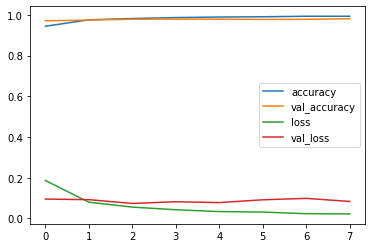

In [68]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

history_es_mc = model_new_2.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[es, mc])

# evaluate the model
_, train_acc = model_new_2.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_new_2.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
plt.plot(history_es_mc.history['accuracy'], label='accuracy')
plt.plot(history_es_mc.history['val_accuracy'], label='val_accuracy')
plt.plot(history_es_mc.history['loss'], label='loss')
plt.plot(history_es_mc.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

In [69]:
best_model = load_model('best_model.h5')
_, train_acc = best_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = best_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.995, Test: 0.981


# Similar but best model based on val_loss

In [74]:
model_new_3 = Sequential()

model_new_3.add(Dense(512, activation='relu', input_shape=(len(X_train[0]),)))
model_new_3.add(Dense(512, activation='relu'))
model_new_3.add(Dense(10, activation='softmax'))

model_new_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/50
1873/1875 [============================>.] - ETA: 0s - loss: 0.1827 - accuracy: 0.9444
Epoch 00001: val_loss improved from inf to 0.08449, saving model to best_model.h5
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1828 - accuracy: 0.9444 - val_loss: 0.0845 - val_accuracy: 0.9735
Epoch 2/50
1875/1875 [==============================] - ETA: 0s - loss: 0.0810 - accuracy: 0.9751
Epoch 00002: val_loss improved from 0.08449 to 0.07761, saving model to best_model.h5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0810 - accuracy: 0.9751 - val_loss: 0.0776 - val_accuracy: 0.9737
Epoch 3/50
1875/1875 [==============================] - ETA: 0s - loss: 0.0561 - accuracy: 0.9821
Epoch 00003: val_loss improved from 0.07761 to 0.07482, saving model to best_model.h5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0561 - accuracy: 0.9821 - val_loss: 0.0748 - val_accuracy: 0.9780
Epoch 4/50
1874/1875 [=========================

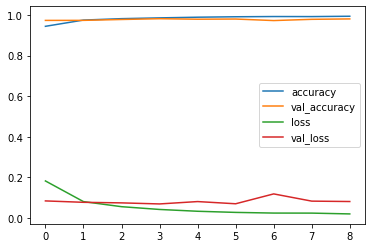

In [75]:

es = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)
mc = ModelCheckpoint('best_model_mc_loss.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

history_es_mc_loss = model_new_3.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[es, mc])

# evaluate the model
_, train_acc = model_new_3.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_new_3.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
plt.plot(history_es_mc_loss.history['accuracy'], label='accuracy')
plt.plot(history_es_mc_loss.history['val_accuracy'], label='val_accuracy')
plt.plot(history_es_mc_loss.history['loss'], label='loss')
plt.plot(history_es_mc_loss.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

In [76]:
best_model = load_model('best_model_mc_loss.h5')
_, train_acc = best_model.evaluate(X_train, y_train, verbose=0)
_, test_acc = best_model.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.992, Test: 0.982


# Decreasing Learning Rate from 0.01 to 0.001

Epoch 1/50
1875/1875 [==============================] - ETA: 0s - loss: 0.1847 - accuracy: 0.9431
Epoch 00001: val_loss improved from inf to 0.12822, saving model to best_model_mc_loss_0_001.h5
1875/1875 [==============================] - 44s 24ms/step - loss: 0.1847 - accuracy: 0.9431 - val_loss: 0.1282 - val_accuracy: 0.9609
Epoch 2/50
1873/1875 [============================>.] - ETA: 0s - loss: 0.0823 - accuracy: 0.9742
Epoch 00002: val_loss improved from 0.12822 to 0.08978, saving model to best_model_mc_loss_0_001.h5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0823 - accuracy: 0.9742 - val_loss: 0.0898 - val_accuracy: 0.9733
Epoch 3/50
1875/1875 [==============================] - ETA: 0s - loss: 0.0555 - accuracy: 0.9824
Epoch 00003: val_loss improved from 0.08978 to 0.08072, saving model to best_model_mc_loss_0_001.h5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0555 - accuracy: 0.9824 - val_loss: 0.0807 - val_accuracy: 0.9776
Epoch

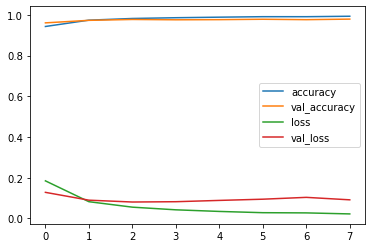

In [79]:
from keras import optimizers

model_new_4 = Sequential()

model_new_4.add(Dense(512, activation='relu', input_shape=(len(X_train[0]),)))
model_new_4.add(Dense(512, activation='relu'))
model_new_4.add(Dense(10, activation='softmax'))

my_adam = optimizers.Adam(learning_rate=0.001)
model_new_4.compile(optimizer=my_adam, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)
mc = ModelCheckpoint('best_model_mc_loss_0_001.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

history_es_mc_loss_0_001 = model_new_4.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[es, mc])

# evaluate the model
_, train_acc = model_new_4.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_new_4.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
plt.plot(history_es_mc_loss_0_001.history['accuracy'], label='accuracy')
plt.plot(history_es_mc_loss_0_001.history['val_accuracy'], label='val_accuracy')
plt.plot(history_es_mc_loss_0_001.history['loss'], label='loss')
plt.plot(history_es_mc_loss_0_001.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

In [85]:
best_model = load_model('best_model_mc_loss_0_001.h5')
train_loss, train_acc = best_model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: Train: %.3f, Test: %.3f' % (train_acc, test_acc))
print('Loss: Train: %.3f, Test: %.3f' % (train_loss, test_loss))

Accuracy: Train: 0.992, Test: 0.978
Loss: Train: 0.025, Test: 0.074


# Only Learning Rate (no callbacks)

Epoch 1/50
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1829 - accuracy: 0.9456 - val_loss: 0.1012 - val_accuracy: 0.9706
Epoch 2/50
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0812 - accuracy: 0.9748 - val_loss: 0.0886 - val_accuracy: 0.9734
Epoch 3/50
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0561 - accuracy: 0.9821 - val_loss: 0.0734 - val_accuracy: 0.9775
Epoch 4/50
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0431 - accuracy: 0.9861 - val_loss: 0.0755 - val_accuracy: 0.9768
Epoch 5/50
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0328 - accuracy: 0.9893 - val_loss: 0.1015 - val_accuracy: 0.9739
Epoch 6/50
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0292 - accuracy: 0.9908 - val_loss: 0.0921 - val_accuracy: 0.9785
Epoch 7/50
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0248 - accuracy: 0.9924 - val_loss: 0.1060 -

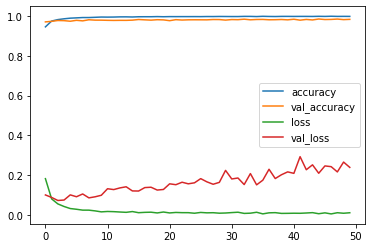

In [81]:
from keras import optimizers

model_new_5 = Sequential()

model_new_5.add(Dense(512, activation='relu', input_shape=(len(X_train[0]),)))
model_new_5.add(Dense(512, activation='relu'))
model_new_5.add(Dense(10, activation='softmax'))

my_adam = optimizers.Adam(learning_rate=0.001)
model_new_5.compile(optimizer=my_adam, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)
mc = ModelCheckpoint('best_model_mc_loss_0_001.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

history_0_001 = model_new_5.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), callbacks=[])

# evaluate the model
_, train_acc = model_new_5.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_new_5.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
plt.plot(history_0_001.history['accuracy'], label='accuracy')
plt.plot(history_0_001.history['val_accuracy'], label='val_accuracy')
plt.plot(history_0_001.history['loss'], label='loss')
plt.plot(history_0_001.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

: 0.9526
Epoch 10/1000
1872/1875 [============================>.] - ETA: 0s - loss: 0.1638 - accuracy: 0.9542
Epoch 00010: val_loss improved from 0.17171 to 0.16310, saving model to best_model_mc_loss_0_00001.h5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1639 - accuracy: 0.9541 - val_loss: 0.1631 - val_accuracy: 0.9537
Epoch 11/1000
1874/1875 [============================>.] - ETA: 0s - loss: 0.1543 - accuracy: 0.9567
Epoch 00011: val_loss improved from 0.16310 to 0.15626, saving model to best_model_mc_loss_0_00001.h5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1543 - accuracy: 0.9567 - val_loss: 0.1563 - val_accuracy: 0.9566
Epoch 12/1000
1875/1875 [==============================] - ETA: 0s - loss: 0.1457 - accuracy: 0.9590
Epoch 00012: val_loss improved from 0.15626 to 0.14921, saving model to best_model_mc_loss_0_00001.h5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1457 - accuracy: 0.9590 - val_loss: 0.1492 

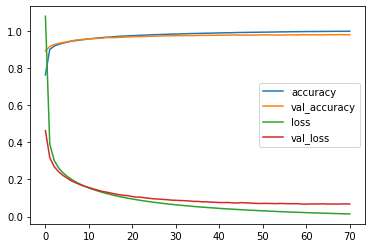

In [86]:
from keras import optimizers

model_new_6 = Sequential()

model_new_6.add(Dense(512, activation='relu', input_shape=(len(X_train[0]),)))
model_new_6.add(Dense(512, activation='relu'))
model_new_6.add(Dense(10, activation='softmax'))

my_adam = optimizers.Adam(learning_rate=0.00001)
model_new_6.compile(optimizer=my_adam, loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)
mc = ModelCheckpoint('best_model_mc_loss_0_00001.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

history_0_00001 = model_new_6.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), callbacks=[es, mc])

# evaluate the model
_, train_acc = model_new_6.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_new_6.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
plt.plot(history_0_00001.history['accuracy'], label='accuracy')
plt.plot(history_0_00001.history['val_accuracy'], label='val_accuracy')
plt.plot(history_0_00001.history['loss'], label='loss')
plt.plot(history_0_00001.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

In [87]:
best_model = load_model('best_model_mc_loss_0_00001.h5')
train_loss, train_acc = best_model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: Train: %.3f, Test: %.3f' % (train_acc, test_acc))
print('Loss: Train: %.3f, Test: %.3f' % (train_loss, test_loss))

Accuracy: Train: 0.997, Test: 0.979
Loss: Train: 0.020, Test: 0.067


Epoch 1/1000
1875/1875 [==============================] - ETA: 0s - loss: 0.3086 - accuracy: 0.9056
Epoch 00001: val_loss improved from inf to 0.12318, saving model to best_model_dropout.h5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.3086 - accuracy: 0.9056 - val_loss: 0.1232 - val_accuracy: 0.9625
Epoch 2/1000
1873/1875 [============================>.] - ETA: 0s - loss: 0.1718 - accuracy: 0.9476
Epoch 00002: val_loss improved from 0.12318 to 0.09277, saving model to best_model_dropout.h5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1718 - accuracy: 0.9476 - val_loss: 0.0928 - val_accuracy: 0.9704
Epoch 3/1000
1872/1875 [============================>.] - ETA: 0s - loss: 0.1455 - accuracy: 0.9564
Epoch 00003: val_loss did not improve from 0.09277
1875/1875 [==============================] - 39s 21ms/step - loss: 0.1456 - accuracy: 0.9564 - val_loss: 0.0947 - val_accuracy: 0.9710
Epoch 4/1000
1872/1875 [============================>.] - ET

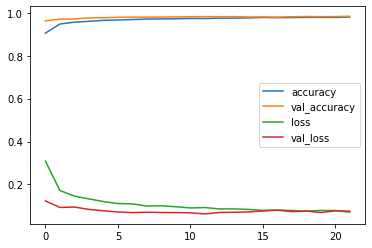

In [21]:
from keras import optimizers
from keras.layers import Dropout

model_new_7 = Sequential()

model_new_7.add(Dense(512, activation='relu', input_shape=(len(X_train[0]),)))
model_new_7.add(Dropout(0.5))
model_new_7.add(Dense(512, activation='relu'))
model_new_7.add(Dropout(0.5))
model_new_7.add(Dense(10, activation='softmax'))

model_new_7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', mode='min', patience=10, verbose=1)
mc = ModelCheckpoint('best_model_dropout.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

best_model_dropout = model_new_7.fit(X_train, y_train, epochs=1000, validation_data=(X_test, y_test), callbacks=[es, mc])

# evaluate the model
_, train_acc = model_new_7.evaluate(X_train, y_train, verbose=0)
_, test_acc = model_new_7.evaluate(X_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# plot training history
plt.plot(best_model_dropout.history['accuracy'], label='accuracy')
plt.plot(best_model_dropout.history['val_accuracy'], label='val_accuracy')
plt.plot(best_model_dropout.history['loss'], label='loss')
plt.plot(best_model_dropout.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

In [23]:
from keras.models import load_model

best_model = load_model('best_model_dropout.h5')
train_loss, train_acc = best_model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: Train: %.3f, Test: %.3f' % (train_acc, test_acc))
print('Loss: Train: %.3f, Test: %.3f' % (train_loss, test_loss))

Accuracy: Train: 0.993, Test: 0.982
Loss: Train: 0.022, Test: 0.063


# Convolution Neural Network

## Import the libraries

In [235]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

## Load the data

In [267]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [268]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Pre-processing

In [269]:
batch_size = 128
num_classes = 10
epochs = 3

In [270]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [271]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000, 10)
(10000, 28, 28, 1)
(10000, 10)


# Don't Flatten the 28 x 28 into 784 this time because we have to use Conv2D

## Use the model

In [246]:
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3,3),input_shape=(28,28,1), padding='same', activation='relu'))
cnn.output_shape

(None, 28, 28, 32)

In [247]:
cnn.add(MaxPooling2D())
cnn.output_shape

(None, 14, 14, 32)

In [248]:
cnn.add(Conv2D(32, kernel_size=(3,3),padding='same', activation='relu'))
cnn.output_shape

(None, 14, 14, 32)

In [249]:
cnn.add(MaxPooling2D())
cnn.output_shape

(None, 7, 7, 32)

In [250]:
7*7*32

1568

# Now is the time to flatten the images

In [251]:
cnn.add(Flatten())
cnn.output_shape

(None, 1568)

In [252]:
cnn.add(Dense(64,activation='relu'))
cnn.output_shape

(None, 64)

In [253]:
cnn.add(Dense(10,activation='softmax'))
cnn.output_shape

(None, 10)

In [254]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)
print(cnn.summary())

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                100416    
_________________________________________________________________
dense_11 (Dense)             (None, 10)              

In [214]:
32 * (3*3 + 1)

320

In [215]:
32 * (3*3 + 1)

320

In [222]:
32 * (32 * 3 * 3 + 1)

9248

In [223]:
7 * 7 * 32

1568

In [227]:
(1568+1) * (64)

100416

In [255]:
history_cnn = cnn.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 208s 111ms/step - loss: 0.1645 - accuracy: 0.9501 - val_loss: 0.0544 - val_accuracy: 0.9831
Epoch 2/20
1875/1875 [==============================] - 201s 107ms/step - loss: 0.0537 - accuracy: 0.9828 - val_loss: 0.0451 - val_accuracy: 0.9847
Epoch 3/20
1875/1875 [==============================] - 230s 123ms/step - loss: 0.0363 - accuracy: 0.9886 - val_loss: 0.0341 - val_accuracy: 0.9890
Epoch 4/20
1875/1875 [==============================] - 253s 135ms/step - loss: 0.0280 - accuracy: 0.9910 - val_loss: 0.0304 - val_accuracy: 0.9900
Epoch 5/20
1875/1875 [==============================] - 244s 130ms/step - loss: 0.0211 - accuracy: 0.9931 - val_loss: 0.0335 - val_accuracy: 0.9879
Epoch 6/20
1875/1875 [==============================] - 239s 127ms/step - loss: 0.0163 - accuracy: 0.9944 - val_loss: 0.0384 - val_accuracy: 0.9892
Epoch 7/20
1875/1875 [==============================] - 219s 117ms/step - loss: 0.0126 - accuracy: 0.9958 - val_

Recall that when using neural networks we got good accuracy.

In [256]:
cnn.save('cnn_model/')
cnn.save_weights('cnn_model_weights/')

INFO:tensorflow:Assets written to: cnn_model/assets


In [273]:
cnn.save_weights('cnn_model_weights.h5')

Comparing this to using CNNs - the performance is far superior.

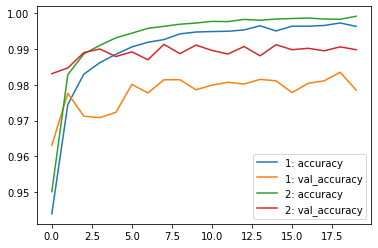

In [261]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.legend(['1: accuracy', '1: val_accuracy', '2: accuracy', '2: val_accuracy'])

In [275]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 9s 29ms/step - loss: 0.0593 - accuracy: 0.9898


[0.05926879867911339, 0.989799976348877]

In [262]:
test = np.expand_dims(X_test[0], axis=0)
test.shape

(1, 28, 28, 1)

In [264]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [263]:
cnn.predict(test)

array([[2.5176856e-22, 4.5560802e-18, 3.7998089e-20, 6.9187061e-19,
        3.5730669e-26, 6.2590591e-23, 1.1423870e-33, 1.0000000e+00,
        1.8584506e-23, 2.9835229e-16]], dtype=float32)